In [1]:
from glob import glob
import locale
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
locale.setlocale(locale.LC_ALL,'pt')

'pt'

In [3]:
def format_ons_open_data( folder_name:str, columns:list[str], subsystems:list[str]=['NE','N','SE','S'], index_item:int=0)->pd.DataFrame:
    
    paths = glob(f'{folder_name}/*')
    columns = columns
    id_subs = subsystems
    dataframe_dict = dict(zip(id_subs, [pd.DataFrame()]*len(id_subs)))

    for path in paths:
        df = pd.read_csv(path, sep=';')

        for key in dataframe_dict.keys():
            aux = df.loc[df['id_subsistema']==key].copy()
            aux.index = pd.to_datetime(aux[columns[index_item]])
            aux = aux[[element for element in columns if element != columns[index_item]]].copy()
            aux.columns = [element + f'_{key}' for element in aux.columns]
            dataframe_dict[key] = pd.concat([dataframe_dict[key], aux])

    return pd.concat(list(dataframe_dict.values()),axis=1)

In [4]:
final_EAR_dataframe = format_ons_open_data('EAR', ['ear_data', 'ear_max_subsistema','ear_verif_subsistema_mwmes', 'ear_verif_subsistema_percentual'])

In [5]:
final_CMO_dataframe = format_ons_open_data('CMO_SEMANAL',['din_instante', 'val_cmomediasemanal', 'val_cmoleve', 'val_cmomedia', 'val_cmopesada'])

In [79]:
pd.date_range('2001-07-01','2023-03-31',freq='W-SUN')

DatetimeIndex(['2001-07-01', '2001-07-08', '2001-07-15', '2001-07-22',
               '2001-07-29', '2001-08-05', '2001-08-12', '2001-08-19',
               '2001-08-26', '2001-09-02',
               ...
               '2023-01-22', '2023-01-29', '2023-02-05', '2023-02-12',
               '2023-02-19', '2023-02-26', '2023-03-05', '2023-03-12',
               '2023-03-19', '2023-03-26'],
              dtype='datetime64[ns]', length=1135, freq='W-SUN')

In [101]:
PLD = pd.read_csv('PLD/pld.csv',sep=';',parse_dates=[3,4], index_col=[4]).iloc[1:]

In [102]:
PLD = PLD[PLD.columns[4:]]

In [125]:
plot_df = pd.DataFrame()

In [126]:
plot_df['CMO_SUDESTE'] = final_CMO_dataframe[final_CMO_dataframe.columns[[11]]]
plot_df['PLD_SUDESTE'] = PLD['SUDESTE'][PLD.index>='2005-01-01']
#plot_df['EAR_TOTAL'] = final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100

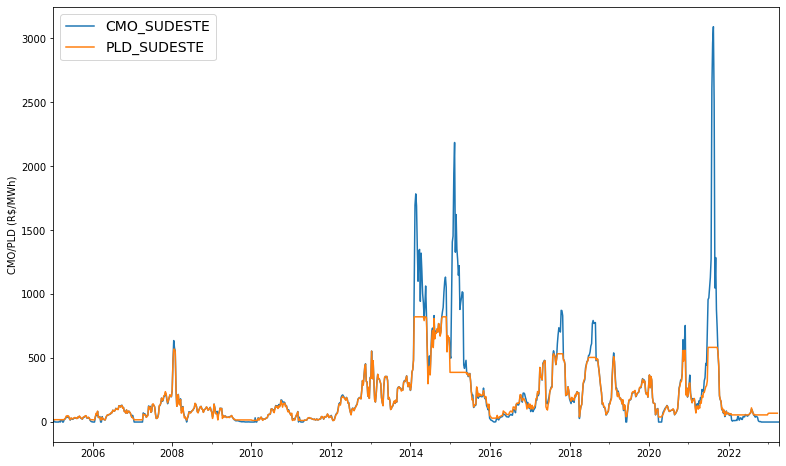

In [134]:
plot_df.plot(figsize=(13,8), xlabel='', ylabel='CMO/PLD (R$/MWh)')
plt.legend(fontsize=14)
plt.savefig('pldvscmo.jpg', dpi=300)

In [114]:
plot_df

,PLD_SUDESTE,CMO_SUDESTE,EAR_TOTAL
DATA_FIM,,,
2005-01-07,18.33,0.00,64.189289
2005-01-14,18.33,7.64,66.453380
2005-01-21,18.33,0.93,69.574259
2005-01-28,18.33,0.00,71.789189
2005-02-04,18.33,0.00,74.413006
...,...,...,...
2023-03-03,69.04,0.00,80.657531
2023-03-10,69.04,0.00,82.748316
2023-03-17,69.04,0.00,83.856623


<AxesSubplot:xlabel='DATA_FIM'>

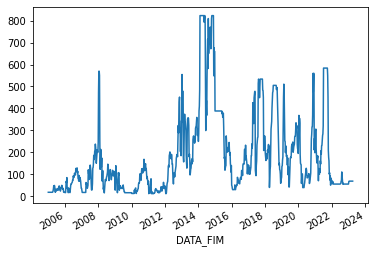

In [108]:
PLD['SUDESTE'][PLD.index>='2005-01-01'].plot()

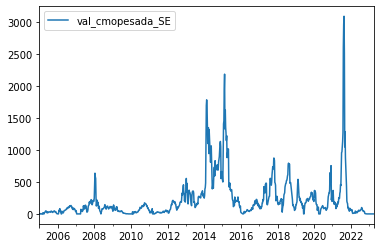

In [6]:
ax = (final_CMO_dataframe[final_CMO_dataframe.columns[[11]]]).plot(xlabel='')

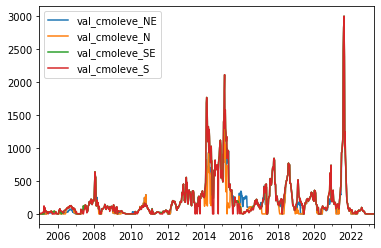

In [7]:
ax = (final_CMO_dataframe[final_CMO_dataframe.columns[1::4]]).plot(xlabel='')

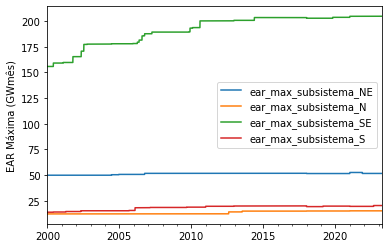

In [8]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='')
#ax.legend(['NE','N','SE','S'])

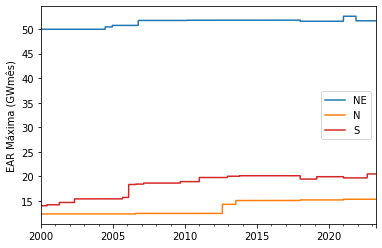

In [9]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[0::3]]/1000).plot(ylabel='EAR Máxima (GWmês)', xlabel='')
ax.lines.remove(ax.lines[2])
#ax.set_ylim([5,60])
ax.relim()
ax.autoscale_view()
ax.legend(['NE','N','S'])

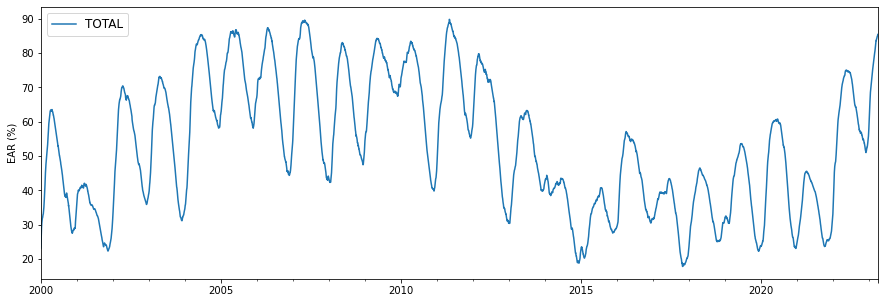

In [10]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
ax.legend(['TOTAL'], loc='upper left', fontsize=12)
#ax.set_ylim([0,100])

<AxesSubplot:xlabel='din_instante'>

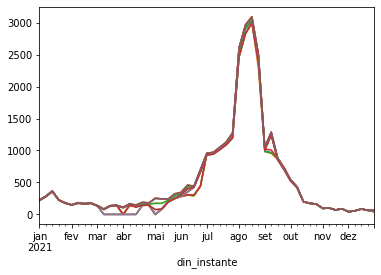

In [27]:
final_CMO_dataframe[final_CMO_dataframe.index.year==2021].plot(legend='')

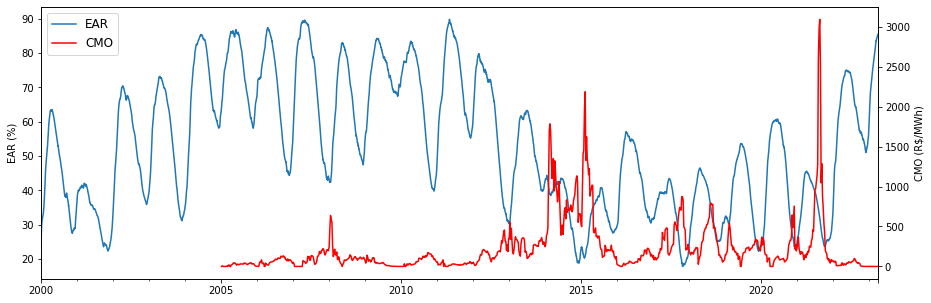

In [11]:
ax = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5), label='EAR')
line1 = ax.lines
ax2 = ax.twinx()
y = final_CMO_dataframe[final_CMO_dataframe.columns[11]].values
x = final_CMO_dataframe[final_CMO_dataframe.columns[11]].index
ax2.plot(x,y, color='red', label='CMO')
ax2.set_ylabel('CMO (R$/MWh)')

line2 = ax2.lines

lines = line1 + line2

labs = [l.get_label() for l in lines]

ax.legend(lines, labs, loc='upper left', fontsize=12)

In [52]:
EAR_percent_df = final_EAR_dataframe[final_EAR_dataframe.index.year==2021][final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.index.year==2021][final_EAR_dataframe.columns[0::3]].sum(axis=1)*100

In [60]:
EAR_percent_df.loc[lambda x: x.index=='2021-08-01'].values

array([35.49611239])

In [62]:
EAR_percent_df.loc[lambda x: x.index=='2021-08-01'].index.values

array(['2021-08-01T00:00:00.000000000'], dtype='datetime64[ns]')

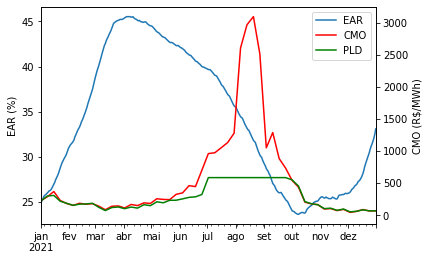

In [122]:
ax = (final_EAR_dataframe[final_EAR_dataframe.index.year==2021][final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.index.year==2021][final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', label='EAR')
line1 = ax.lines
ax2 = ax.twinx()
y = final_CMO_dataframe[final_CMO_dataframe.index.year==2021][final_CMO_dataframe.columns[11]].values
x = final_CMO_dataframe[final_CMO_dataframe.index.year==2021][final_CMO_dataframe.columns[11]].index
y_pld = plot_df['PLD_SUDESTE'].values
x_pld = plot_df['PLD_SUDESTE'].index
ax2.plot(x,y, color='red', label='CMO')
ax2.plot(x_pld,y_pld, color='green', label='PLD')
ax2.set_ylabel('CMO (R$/MWh)')
line2 = ax2.lines



lines = line1 + line2

labs = [l.get_label() for l in lines]

ax.legend(lines, labs, loc='upper right', fontsize=10)

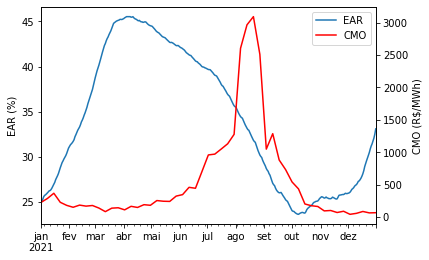

In [42]:
ano=2021
ax = (final_EAR_dataframe[final_EAR_dataframe.index.year==ano][final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.index.year==ano][final_EAR_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', label='EAR')
line1 = ax.lines
ax2 = ax.twinx()
y = final_CMO_dataframe[final_CMO_dataframe.index.year==ano][final_CMO_dataframe.columns[11]].values
x = final_CMO_dataframe[final_CMO_dataframe.index.year==ano][final_CMO_dataframe.columns[11]].index
ax2.plot(x,y, color='red', label='CMO')
ax2.set_ylabel('CMO (R$/MWh)')
line2 = ax2.lines

lines = line1 + line2

labs = [l.get_label() for l in lines]

ax.legend(lines, labs, loc='upper right', fontsize=10)

In [13]:
zoom_dataframe = final_EAR_dataframe.loc[lambda x: (x.index >= '2014-01-01')&(x.index <= '2022-01-01')]

In [14]:
armazenamento_total_df = pd.DataFrame(columns=['EAR%'])

In [15]:
armazenamento_total_df['EAR%'] = (final_EAR_dataframe[final_EAR_dataframe.columns[1::3]].sum(axis=1)/final_EAR_dataframe[final_EAR_dataframe.columns[0::3]].sum(axis=1)*100)

In [16]:
recuperacao_deplecao_df = armazenamento_total_df.resample('YS').agg(['first','max'])['EAR%']

In [17]:
recuperacao_deplecao_df['min'] = armazenamento_total_df.loc[lambda x: x.index.month>7].resample('YS').agg(['min'])['EAR%']

In [18]:
recuperacao_deplecao_df['Variação'] = recuperacao_deplecao_df['max'] - recuperacao_deplecao_df['first']
recuperacao_deplecao_df['Variação_f'] = (recuperacao_deplecao_df['min'] - recuperacao_deplecao_df['max'])

In [19]:
recuperacao_deplecao_df.head()

,first,max,min,Variação,Variação_f
ear_data,,,,,
2000-01-01,23.177150,63.561956,27.580614,40.384806,-35.981341
2001-01-01,36.940582,42.080586,22.337448,5.140003,-19.743138
2002-01-01,32.581431,70.388474,35.873638,37.807043,-34.514836
2003-01-01,39.178490,73.246061,31.145486,34.067571,-42.100575
2004-01-01,34.644000,85.425425,58.139390,50.781424,-27.286035


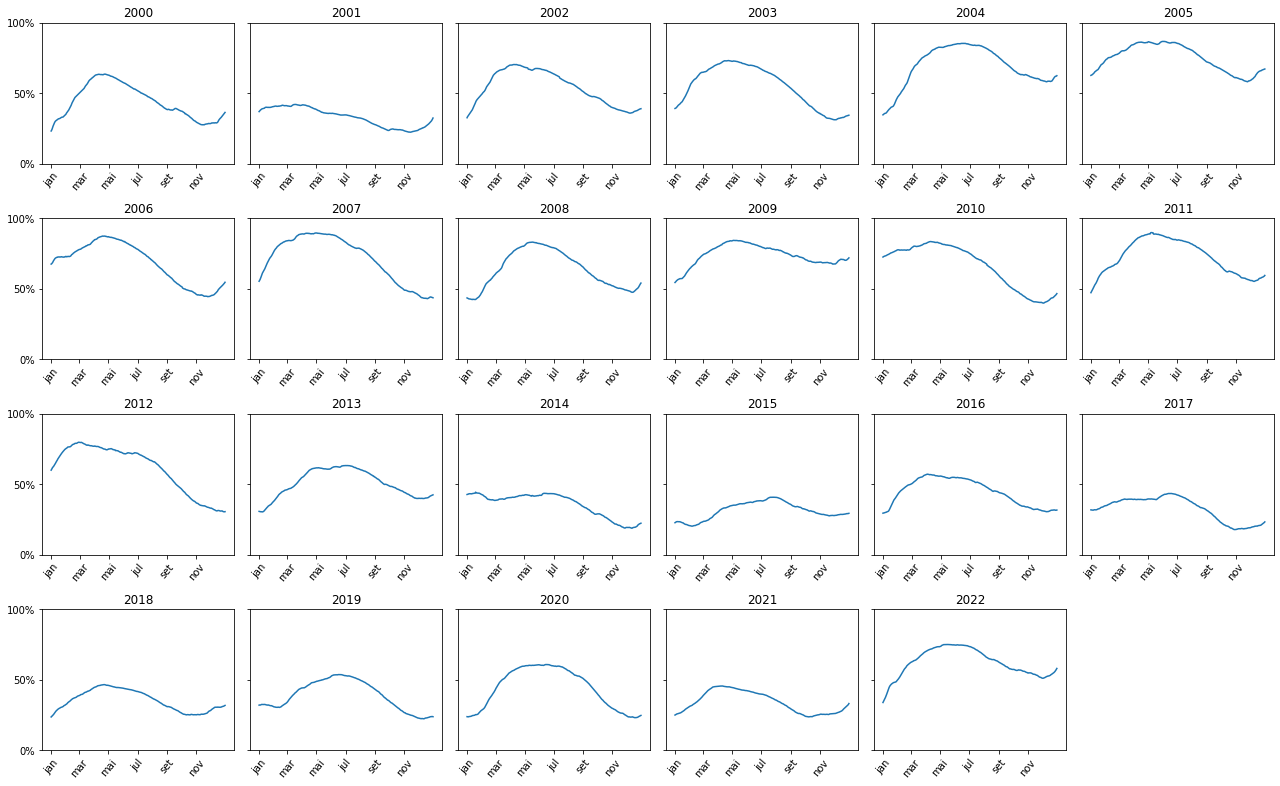

In [20]:
n_rows=4
n_columns = 6

fig, ax = plt.subplots(n_rows,n_columns)
fig.set_size_inches(18, 11)


a = list(range(n_rows))
b = list(range(n_columns))
generator = ((element_a,element_b) for element_a in a for element_b in b)



for year in range(2000,2024):
    index = next(generator)
    axis = ax[index[0]][index[1]]

    x=armazenamento_total_df.loc[lambda x: x.index.year==year].index
    y=armazenamento_total_df.loc[lambda x: x.index.year==year]['EAR%'].values

    axis.plot(x,y)
    
    axis.set_yticks([0,50,100])
    axis.set_title(str(year))

    if index[1]==0:
        axis.set_yticklabels(['0%','50%','100%'])
    else:
        axis.set_yticklabels(['','',''])


    daterange = pd.date_range(start =f'{year}-01-01', end =f'{year}-12-31', freq ='2MS')
    label = [datetime.datetime.strftime(date,'%b') for date in daterange]
    axis.set_xticks(daterange)
    axis.set_xticklabels(label)

    axis.tick_params(axis='x',rotation=50)

fig.tight_layout(pad=1)

ax[-1][-1].axis('off')
ax[-1][-1].set_title('')
ax[-1][-1].lines[0].remove()

plt.savefig('EAR GRID.png', dpi=300)


(-55.0, 90.0)

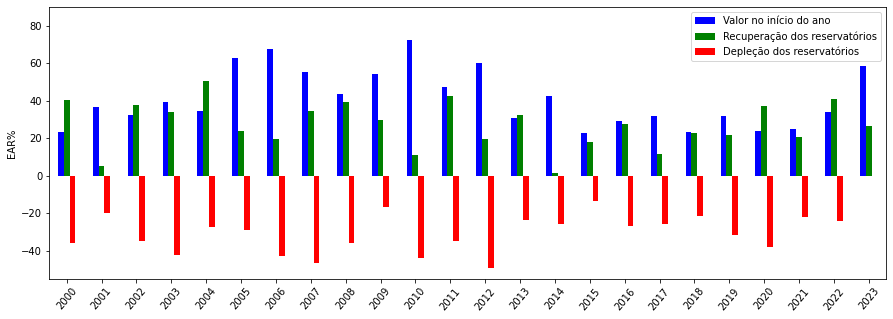

In [21]:
ax = recuperacao_deplecao_df[['first', 'Variação', 'Variação_f']].plot(kind='bar', figsize=(15,5), color=['blue','green','red'])
ax.set_xticklabels([datetime.datetime.strftime(date,'%Y') for date in recuperacao_deplecao_df.index ])
ax.tick_params(axis='x',rotation=50)
ax.legend(['Valor no início do ano','Recuperação dos reservatórios','Depleção dos reservatórios'])
ax.set_xlabel('')
ax.set_ylabel('EAR%')
ax.set_ylim((-55,90))

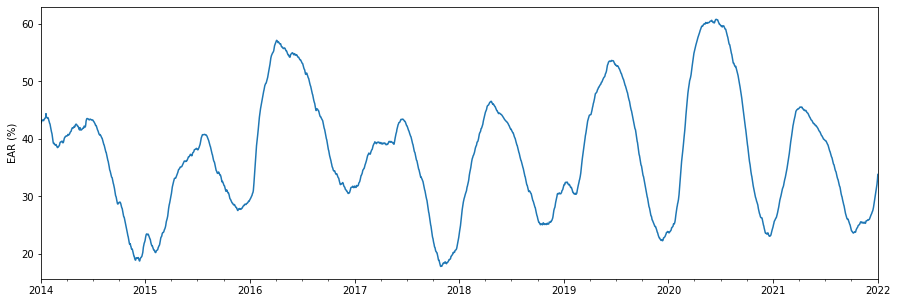

In [22]:
ax = (zoom_dataframe[zoom_dataframe.columns[1::3]].sum(axis=1)/zoom_dataframe[zoom_dataframe.columns[0::3]].sum(axis=1)*100).plot(ylabel='EAR (%)', xlabel='', figsize=(15,5))
#ax.legend(['TOTAL'], loc='upper left', fontsize=15)

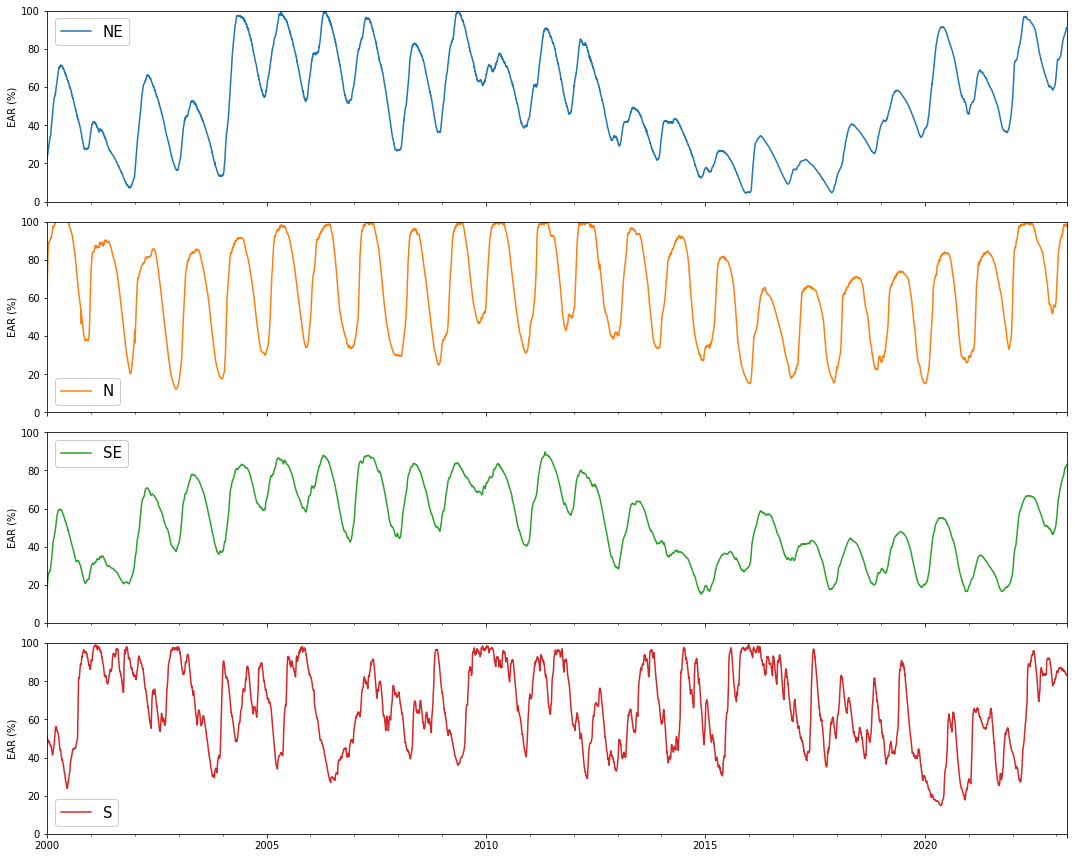

In [23]:
pos=['upper left', 'lower left', 'upper left', 'lower left']
subsystems=['NE','N','SE','S']
subplots = final_EAR_dataframe[final_EAR_dataframe.columns[2::3]].plot(subplots=True, layout=(4,1), figsize=(15,12), ylabel='EAR (%)', ylim=(0,100), xlabel='')
for i, subplop in enumerate(subplots):
    subplop[0].legend([subsystems[i]], loc=pos[i], framealpha=1, fontsize=15)
    
plt.tight_layout(pad=1)
_ = plt.savefig('Níveis_Energia_Armazenada.svg')